### Student Information
Name:楊仁瀚

Student ID:113062528

GitHub ID:113062528

Kaggle name:s113062528

Kaggle private scoreboard snapshot: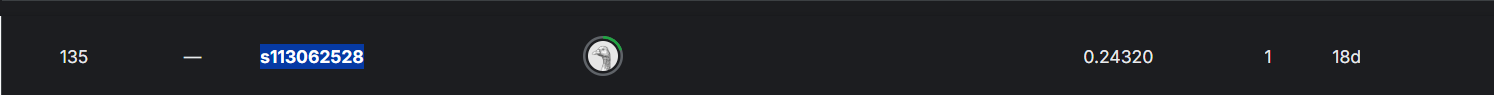

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


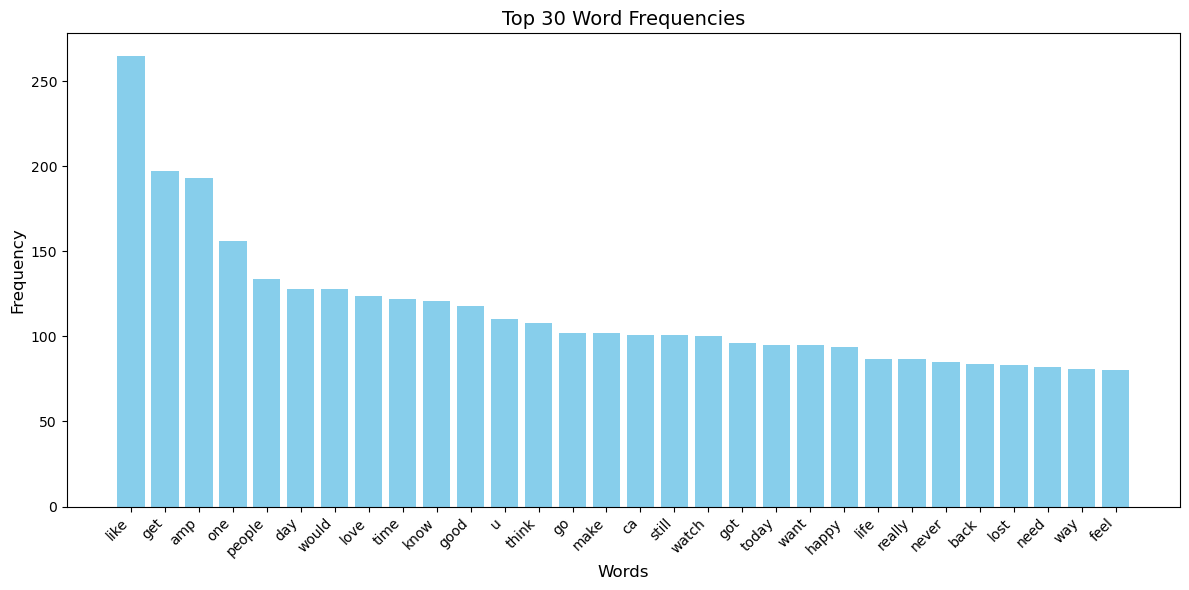

In [ ]:
# Answer here

import nltk
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh
from collections import Counter
import numpy as np


unwanted_tokens = {"'s", "n't", "'m", "'re", "'ve", "'d", "'ll","...",".."}  # Add any additional tokens as needed
dataset_df = pd.concat([test_df,train_df])

dataset_df['unigrams'] =dataset_df['text'].apply(lambda x: dmh.tokenize_text(x))

#all_unigrams = [word for sublist in dataset_df['unigrams'] for word in sublist]
all_unigrams = [word for sublist in dataset_df['unigrams'] for word in sublist if word not in unwanted_tokens]

word_counts = Counter(all_unigrams)

top_30_words = word_counts.most_common(30)

top_30_df = pd.DataFrame(top_30_words, columns=['Word', 'Frequency'])
df = top_30_df

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df['Word'], df['Frequency'], color='skyblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 30 Word Frequencies', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

print(feature_names[100:110])

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
"""
Each column represents the model's predictions, and each row represents the actual answers. 
The diagonal values indicate where the decision tree model correctly predicted the actual answers.
"""

"\nEach column represents the model's predictions, and each row represents the actual answers. \nThe diagonal values indicate where the decision tree model correctly predicted the actual answers.\n"

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

# Train the model
NB_model = NB_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)


## so we get the pred result
y_test_pred[:10]

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
"""
Naive Base Model have higher accuracy of test set but lower accuracy of decision tree ,
More true positive values for anger, fear and joy.
Less false positive values for sadness.
"""


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](attachment:pic3.png)


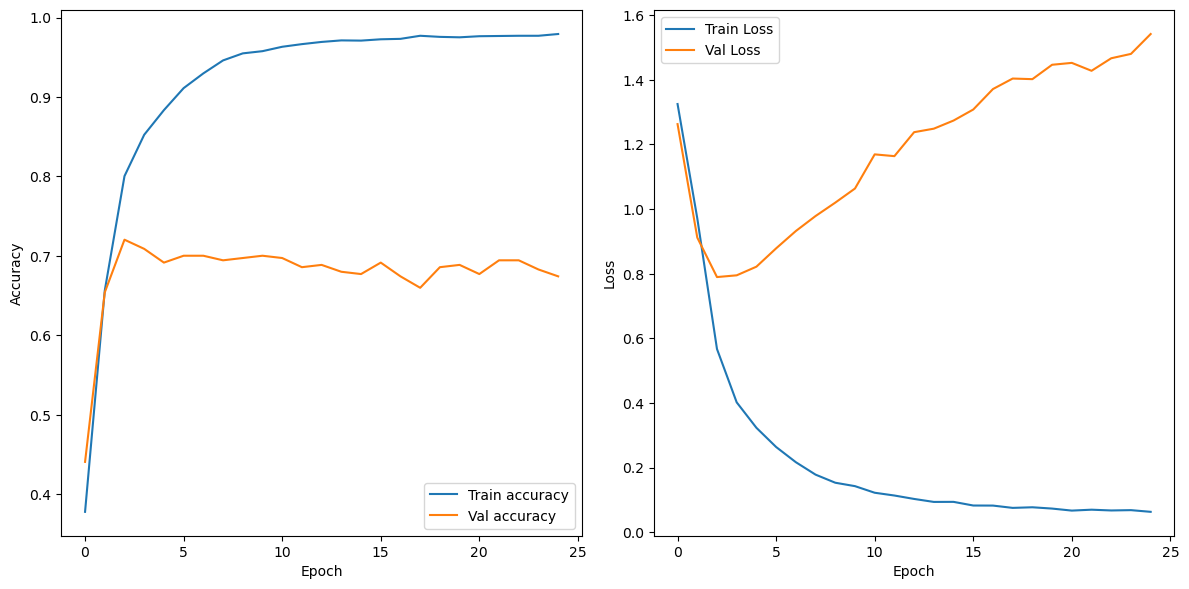

'\nThe training accuracy is very high (97%), and the loss is low. But the validation accuracy is much lower (67%), and the loss is high.\nThis means the model is overfitting.\n'

In [ ]:
# Answer here

# Load the training log
training_log = pd.read_csv("logs/training_log.csv")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=training_log, x=training_log.index, y='accuracy', label='Train accuracy')
sns.lineplot(data=training_log, x=training_log.index, y='val_accuracy', label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
sns.lineplot(data=training_log, x=training_log.index, y='loss', label='Train Loss')
sns.lineplot(data=training_log, x=training_log.index, y='val_loss', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

"""
The training accuracy is very high (97%), and the loss is low. But the validation accuracy is much lower (67%), and the loss is high.
This means the model is overfitting.
"""

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
"""
Break the sentence into individual words.
Transform each word into its corresponding vector representation using a pre-trained Word2Vec model.
Compute the average of the word vectors to obtain a single vector representation for the entire sentence.
Use the sentence vectors as input features to train the model.
"""

'\nBreak the sentence into individual words.\nTransform each word into its corresponding vector representation using a pre-trained Word2Vec model.\nCompute the average of the word vectors to obtain a single vector representation for the entire sentence.\nUse the sentence vectors as input features to train the model.\n'


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

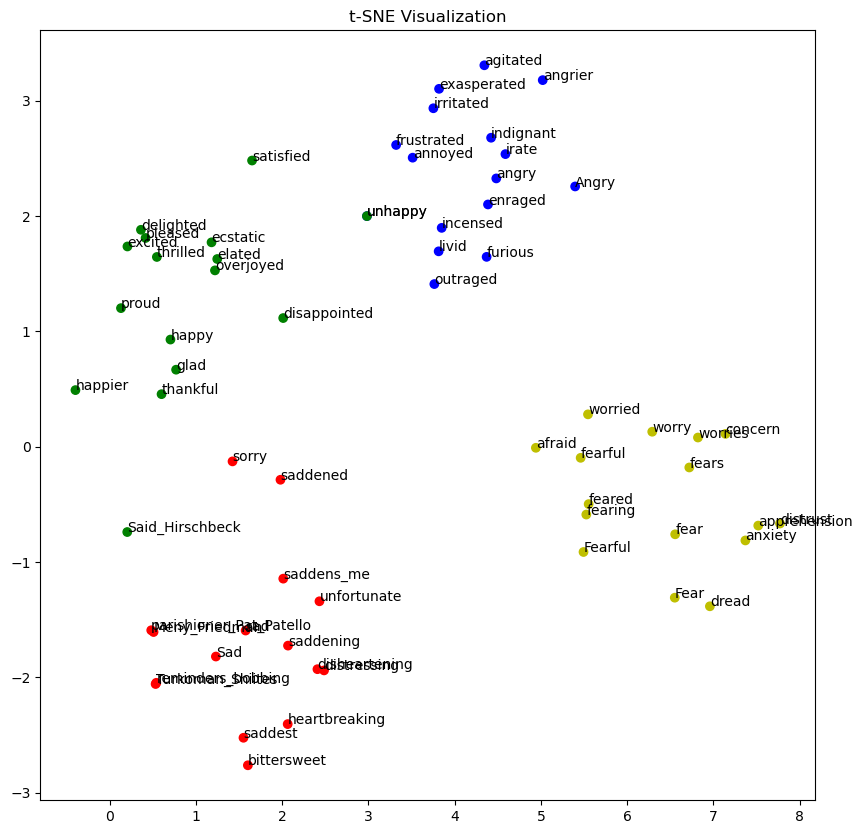

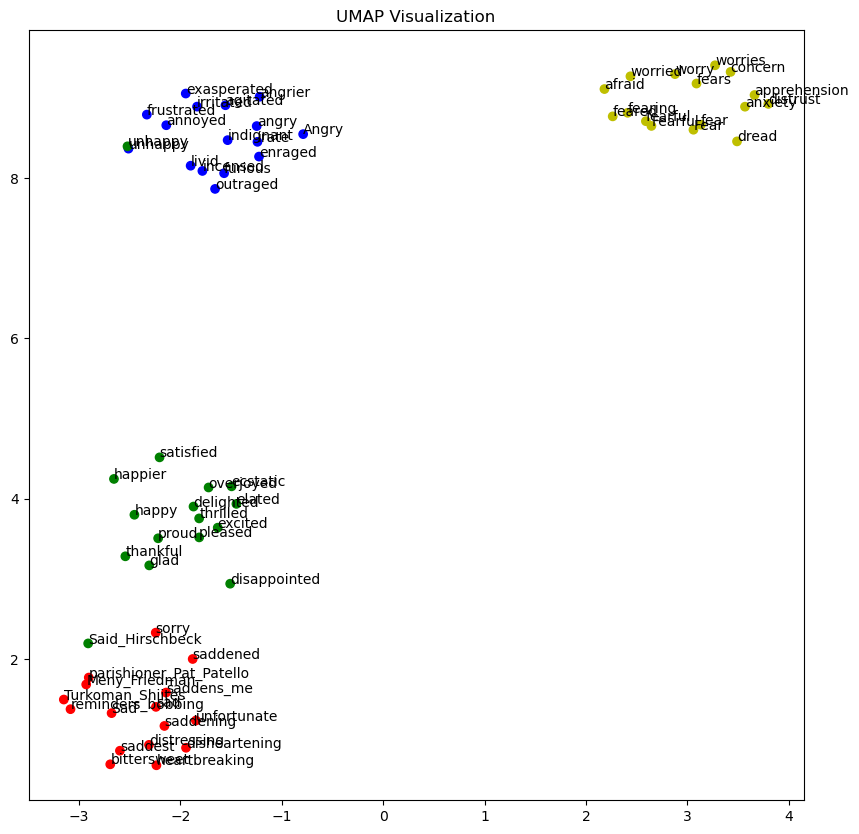

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Define the words and number of similar words to retrieve
base_words = ['angry', 'happy', 'sad', 'fear']
topn = 15
model = w2v_google_model  # Pre-trained Word2Vec model

# Retrieve similar words
related_words = {word: [word] + [sim_word for sim_word, _ in model.most_similar(word, topn=topn)] for word in base_words}

# Flatten the list of words and create a color list
target_words = sum(related_words.values(), [])
color_map = {'angry': 'b', 'happy': 'g', 'sad': 'r', 'fear': 'y'}
colors = sum([[color_map[word]] * (topn + 1) for word in base_words], [])

# Prepare word vectors
target_vectors = np.array([model[word] for word in target_words])  # Convert to NumPy array

# t-SNE visualization
tsne = TSNE(n_components=2, metric='cosine', random_state=42)
X_tsne = tsne.fit_transform(target_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
for label, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title('t-SNE Visualization')
plt.show()

# UMAP visualization
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(target_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)
for label, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title('UMAP Visualization')
plt.show()



### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# Answer here
conversations = [
    {"role": "system", "content": "You are an expert of computer science."},
    {"role": "user", "content": "Please help me with my after school homework"},
    {"role": "assistant", "content": "Of course! What problem are you working on?"},
]

response = ollama.chat(model='llama3.2', messages=conversations)

print(response['message']['content'])

 Do you have a specific assignment or concept that's giving you trouble? Share more details about your homework, and I'll do my best to guide you through it.

Is it related to computer science, like algorithms, data structures, programming languages, or something else?



### ** >>> Exercise 10 (Take home): **  

![picture.jpg](attachment:20010f46-a973-4ddb-9fa7-b11932f3b124.jpg)

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/picture.jpg'] #Image with the cat
    },
])

display(Markdown(response4['message']['content']))
"""
(The output change for new run)
I think it's not very accurate. It only used one finger instead of both hands, and it didn't recognize this celebrity.
The issue might be that the model's parameter is too small, making it unable to accurately identify that this person is Faker.
"""

The image features a young man who is the main subject. He has short black hair and is wearing glasses with gold frames. The glasses add an intellectual touch to his appearance. His attire consists of a black jacket adorned with red and white accents, which adds a pop of color to his otherwise monochrome look.

He is holding the index finger of his right hand up to his mouth in a gesture that often signifies silence or thoughtfulness. This action, combined with his attire and pose, gives him an air of seriousness or contemplation.

The background of the image provides contrast and depth. It's a white wall, which serves as a neutral backdrop that allows the subject to stand out. On this wall, there are two logos: one in red with a black "W" and another in gold with a black "M". These logos could possibly be related to brands or companies known for their sunglasses.

Overall, the image captures a moment of quiet contemplation against a backdrop that hints at popular culture and fashion trends.

"\nI think it's not very accurate. It only used one finger instead of both hands, and it didn't recognize this celebrity.\nThe issue might be that the model's parameter is too small, making it unable to accurately identify that this person is Faker.\n"

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

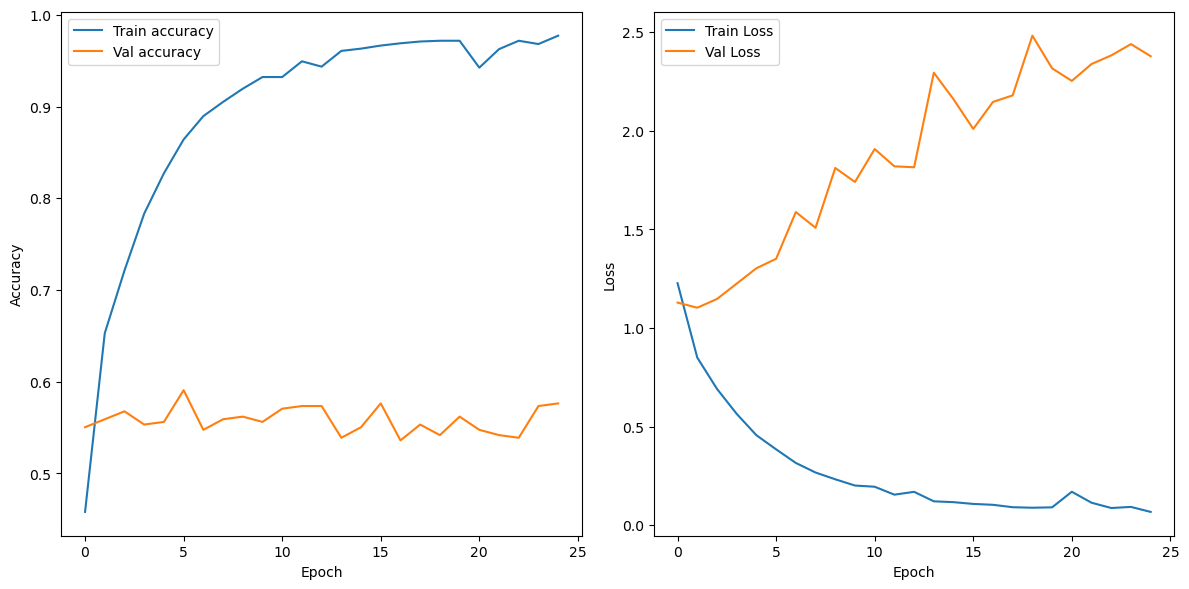

'\nKNN Accuracy: 46.4%\nNN Accuracy: 57.6%\nThe Neural Network (NN) works better than KNN because it can learn and understand patterns in the data, especially when using LLM embeddings,\nwhich contain a lot of meaningful information about the data.\nKNN is a simpler method that just looks at the closest examples, which doesn’t work as well in complicated datasets with many dimensions. \n'

In [ ]:
# Answer here

# Load the training log
training_log = pd.read_csv("logs/training_log_2.csv")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=training_log, x=training_log.index, y='accuracy', label='Train accuracy')
sns.lineplot(data=training_log, x=training_log.index, y='val_accuracy', label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
sns.lineplot(data=training_log, x=training_log.index, y='loss', label='Train Loss')
sns.lineplot(data=training_log, x=training_log.index, y='val_loss', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

"""
KNN Accuracy: 46.4%
NN Accuracy: 57.6%
The Neural Network (NN) works better than KNN because it can learn and understand patterns in the data, especially when using LLM embeddings,
which contain a lot of meaningful information about the data.
KNN is a simpler method that just looks at the closest examples, which doesn’t work as well in complicated datasets with many dimensions. 
"""

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
"""
The results show that giving the model more examples (shots) helps it perform better because it has more information to work with and can better
match its answers to the data.
The accuracy and performance scores get better as the number of examples increases from zero to five.
However, the model doesn't do equally well for all emotions.
It is better at identifying emotions like Anger and Joy because their characteristics are easier to spot,but it struggles with Fear,
probably because it looks similar to other emotions and doesn't have enough examples to fully understand it.
"""

In [ ]:
### Begin Assignment Here